In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip3 install scikit-learn

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Plot

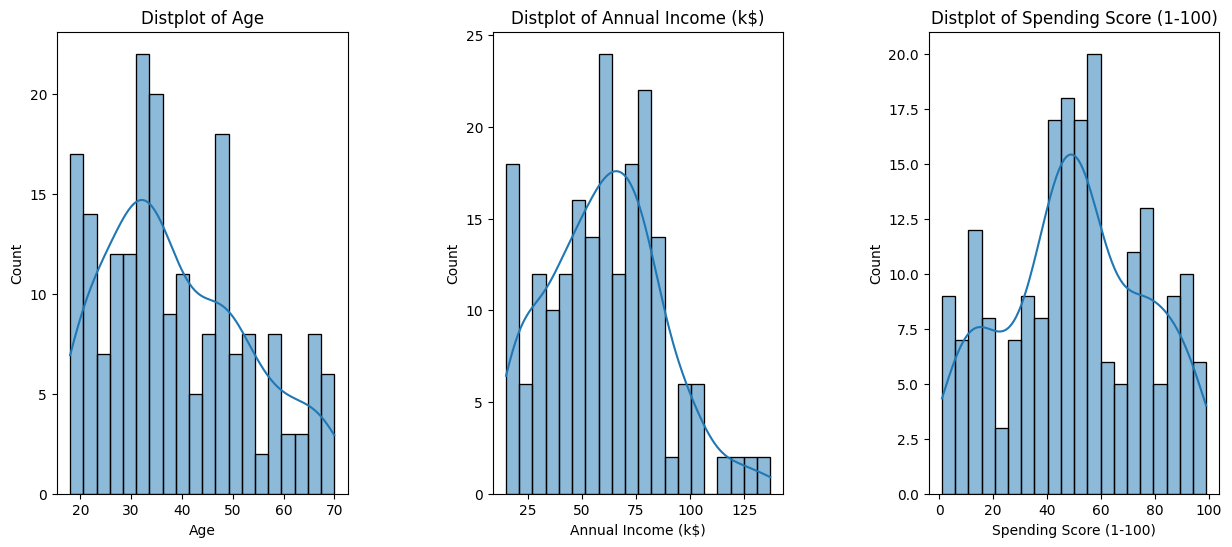

In [4]:
# Distribution plots of Age, Annual Income, and Spending scores
plt.figure(1 , figsize = (15 , 6)) # Dimensions of image

n = 0 

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    
    plt.subplot(1 , 3 , n) # Creates 3 different sub-plots
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    
    sns.histplot(df[x] , bins = 20, kde=True) # Creates a distribution plot
    
    plt.title('Distplot of {}'.format(x)) # Sets title for each plot

plt.show()

# Gender analysis

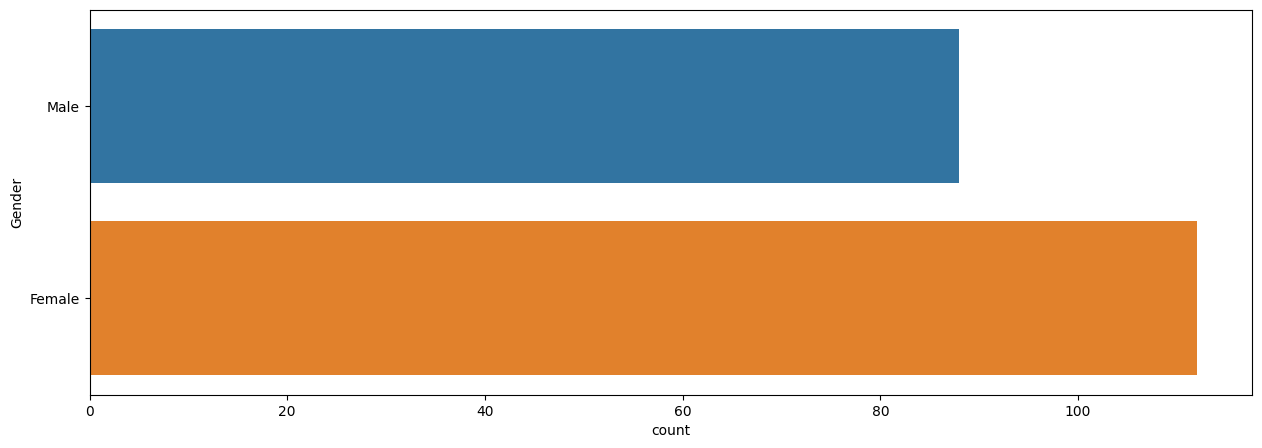

In [5]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [7]:
X_age_spending = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values # extracts only age and spending score information from the dataframe
inertia = []

for n in range(1 , 11):
    
    model_1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, 
                      tol=0.0001,  random_state= 111  , algorithm='lloyd')) # use predefined Kmeans algorithm
    
    model_1.fit(X_age_spending) # fit the data into the model
    inertia.append(model_1.inertia_)

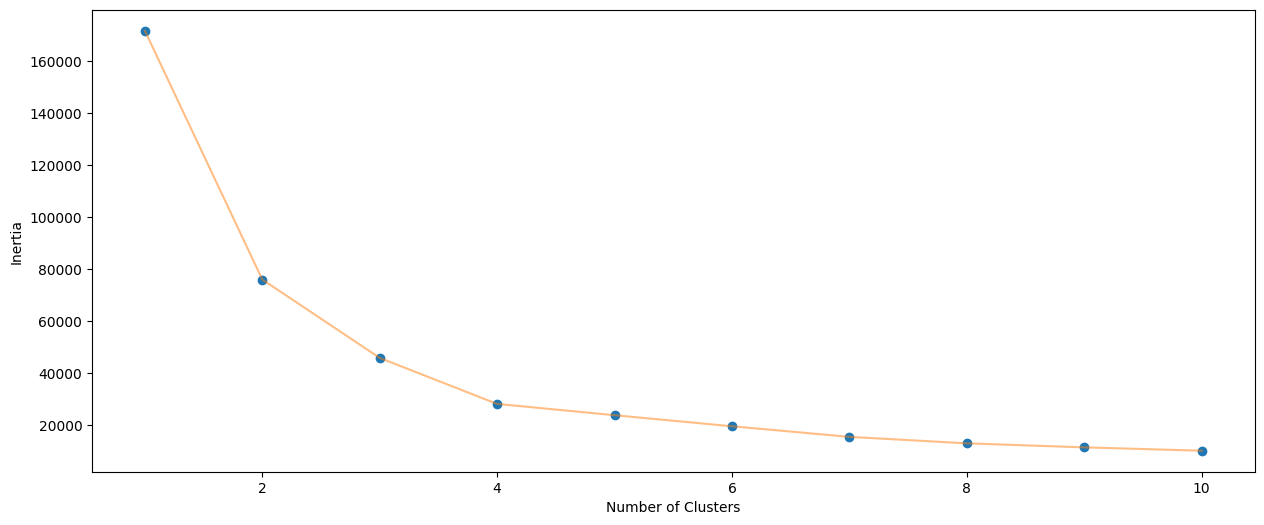

In [9]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o') # Mark the points with a solid circle
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5) # Connect remaining points with a line
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
model_2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') ) # set number of clusters as 4
model_2.fit(X_age_spending) # fit the model
labels1 = model_2.labels_
centroids1 = model_2.cluster_centers_

In [23]:
h = 0.02

x_min, x_max = X_age_spending[:, 0].min() - 1, X_age_spending[:, 0].max() + 1
y_min, y_max = X_age_spending[:, 1].min() - 1, X_age_spending[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])  # returns flattened 1D array


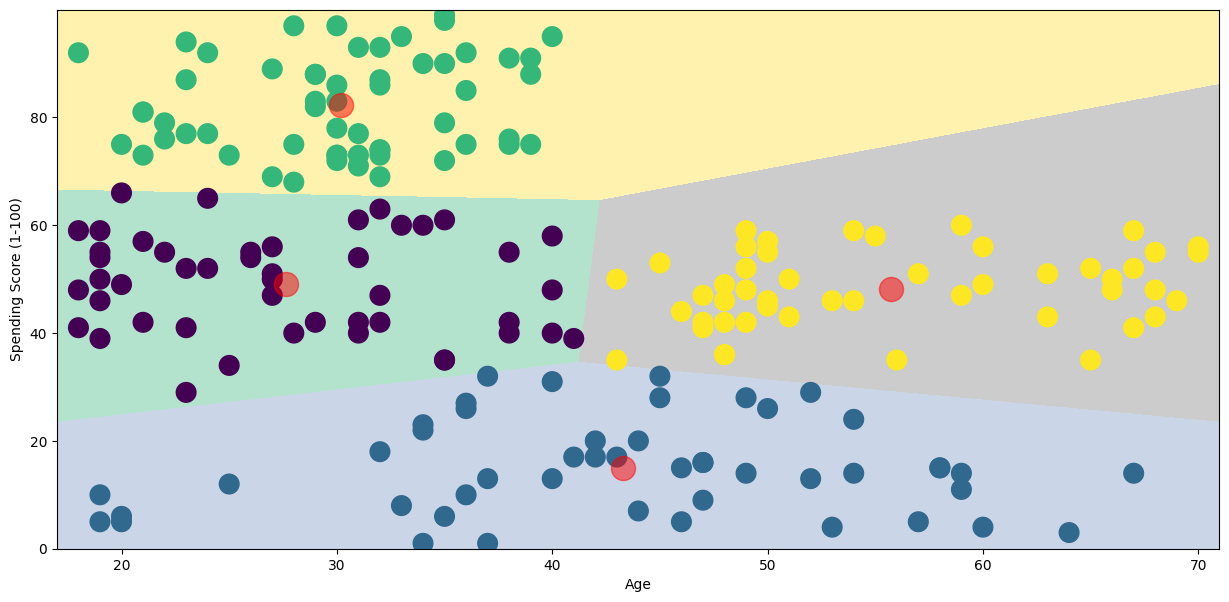

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()
